In [1]:
import pandas as pd
import numpy as np
from pyod.models.mcd import MCD
import matplotlib.pyplot as plt
%run Data_manipulation.ipynb

In [2]:
# MCD

def detect_anomalies(df):

    # Selecting the 'Close' column for anomaly detection
    data = df[['Close']].values

    # Initialize the Fast-MCD model
    mcd = MCD()
    mcd.fit(data)

    # Predict the anomaly scores, 90 percentile as threshold
    anomaly_scores = mcd.decision_function(data)
    anomaly_threshold = np.percentile(anomaly_scores, 90)  
    anomalies = df[anomaly_scores > anomaly_threshold]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies



# NIFTY

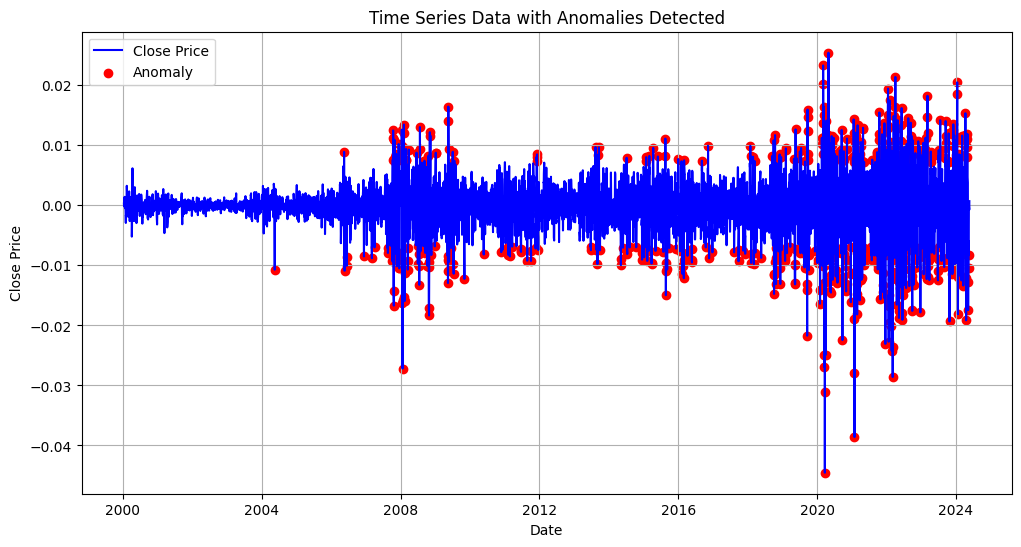

Anomalies:


,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2004-05-17,-0.010731,-0.002699,-0.003889,-0.013149,-0.003883
2006-05-17,0.008896,0.002326,0.005107,0.007505,-0.008935
2006-05-22,-0.010902,-0.004860,-0.004734,-0.015784,0.017130
2006-06-13,-0.008665,-0.003804,-0.006613,-0.006938,-0.003714
2006-06-14,-0.010069,-0.008605,-0.006828,-0.008802,0.001541
...,...,...,...,...,...
2024-05-02,0.011890,0.006709,0.008808,0.012794,0.064044
2024-05-09,-0.017443,-0.006514,-0.006860,-0.013257,0.016907
2024-05-10,-0.012694,-0.016680,-0.014217,-0.012301,-0.012718


In [3]:
# Detecting anomaly
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data, period=14)

# Detect anomalies
anomalies = detect_anomalies(df_residuals)

# Display anomalies (dates)
print("Anomalies:")
anomalies

In [4]:
import matplotlib.pyplot as plt

def plot_with_anomalies(df, anomalies_df, interval):
    # Assuming 'Date' is in datetime format and set as index for the nifty_df dataframe
    #anomalies_df['Date'] = pd.to_datetime(anomalies_df['Date'])
    #anomalies_df.set_index('Date', inplace=True)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

    # Define the start and end years
    start_year = 2000
    end_year = 2025

    # Loop through each 2-year segment and plot the data
    for year in range(start_year, end_year, interval):
        start_date = f"{year}-01-01"
        end_date = f"{year + interval - 1}-12-31"
        
        # Slice the data for the current year segment
        segment = df[start_date:end_date]
        anomalies_in_segment = anomalies_df[start_date:end_date]

        # Plot the current segment
        plt.figure(figsize=(12, 6))
        plt.plot(segment.index, segment['Close'], label="Close Price", color='blue')
        
        # Mark anomalies
        plt.scatter(anomalies_in_segment.index, segment.loc[anomalies_in_segment.index]['Close'], color='red', label='Anomaly')
        
        # Plot settings
        plt.title(f'Data with Anomalies ({year}-{year + interval - 1})')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid(True)
        plt.show()


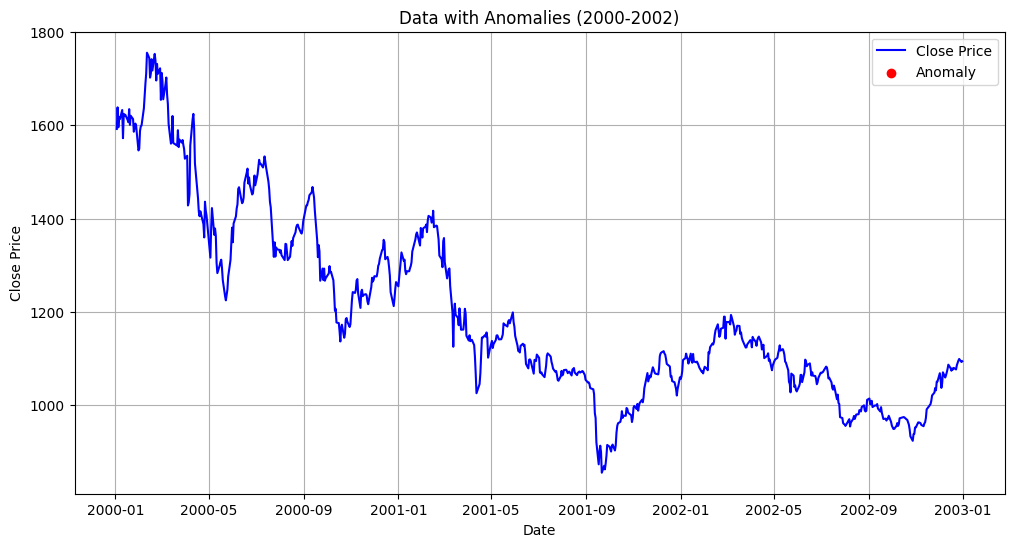

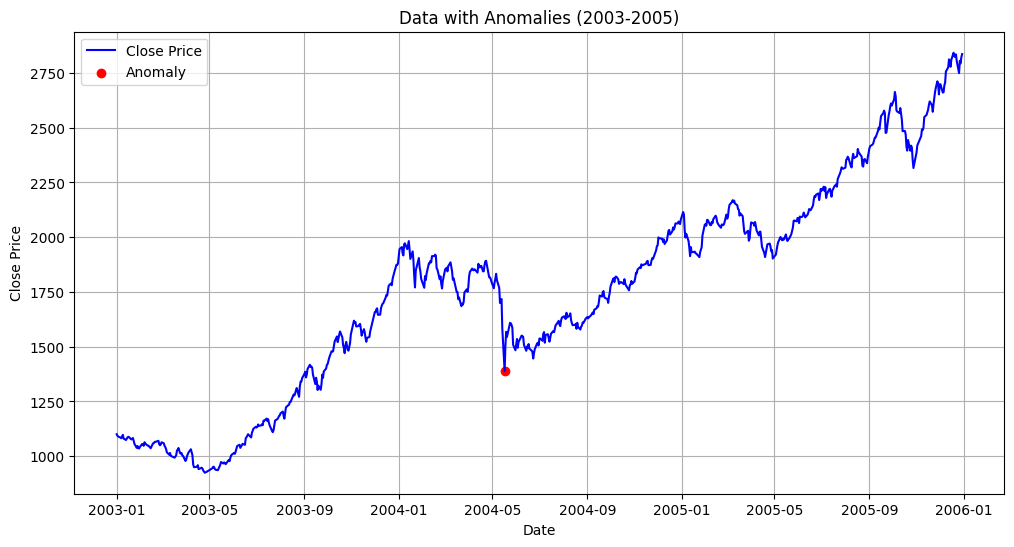

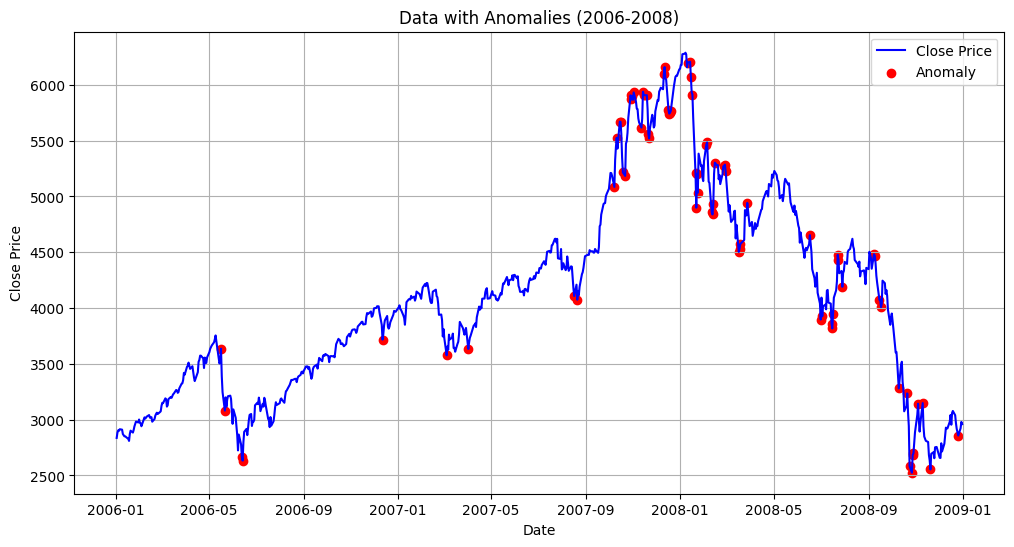

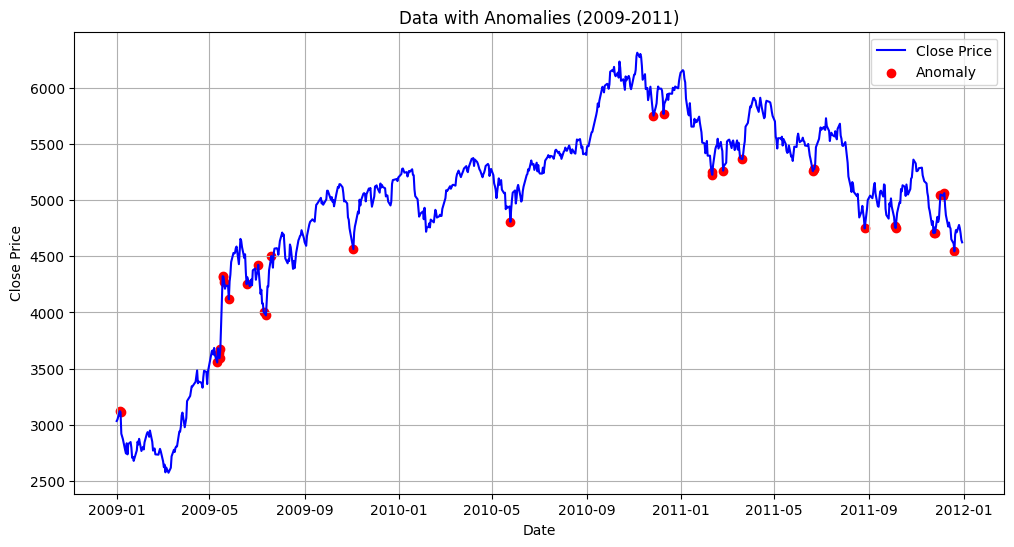

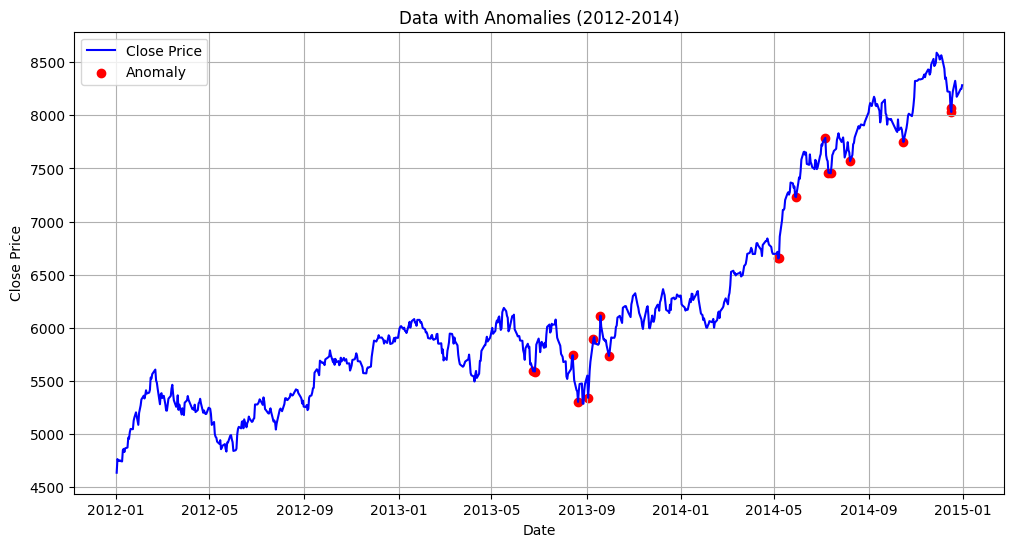

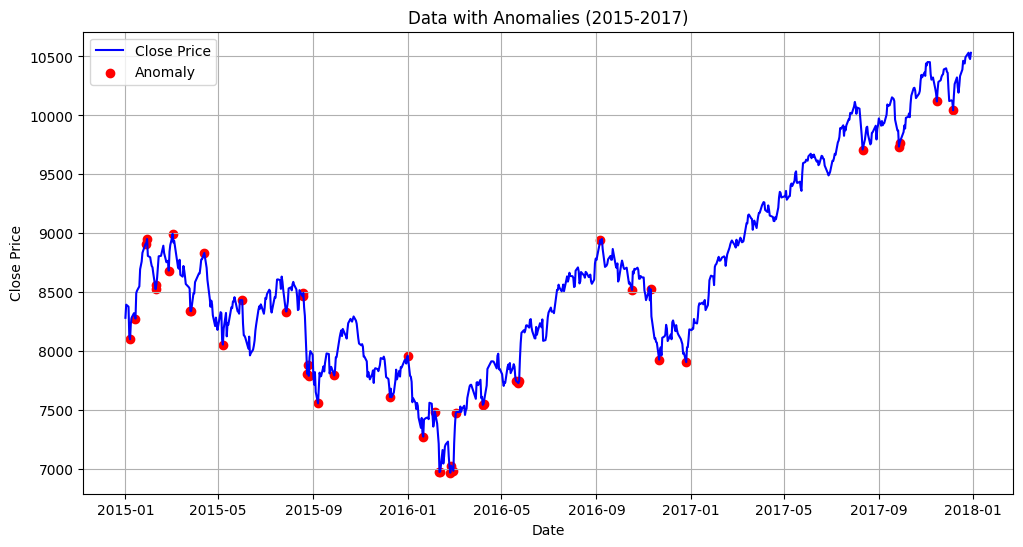

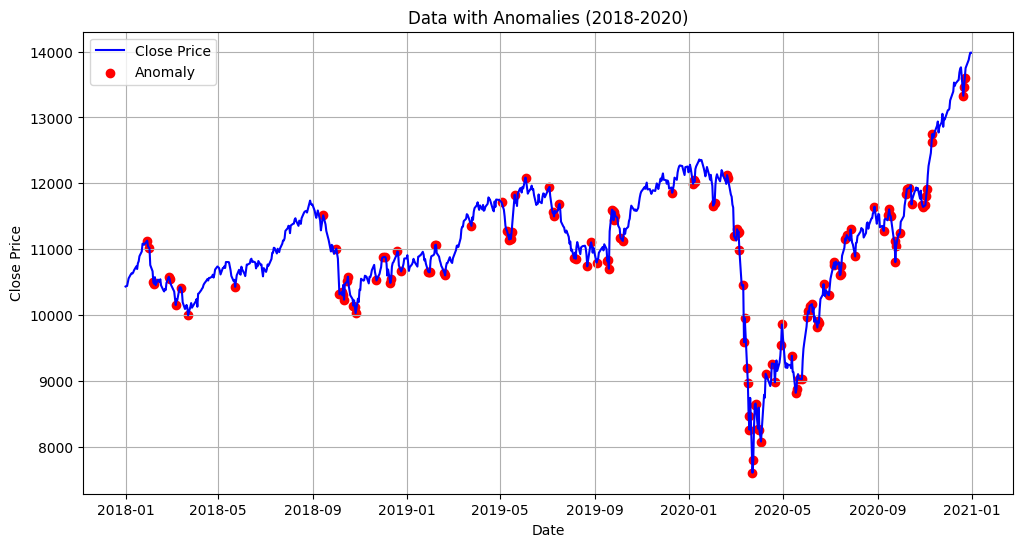

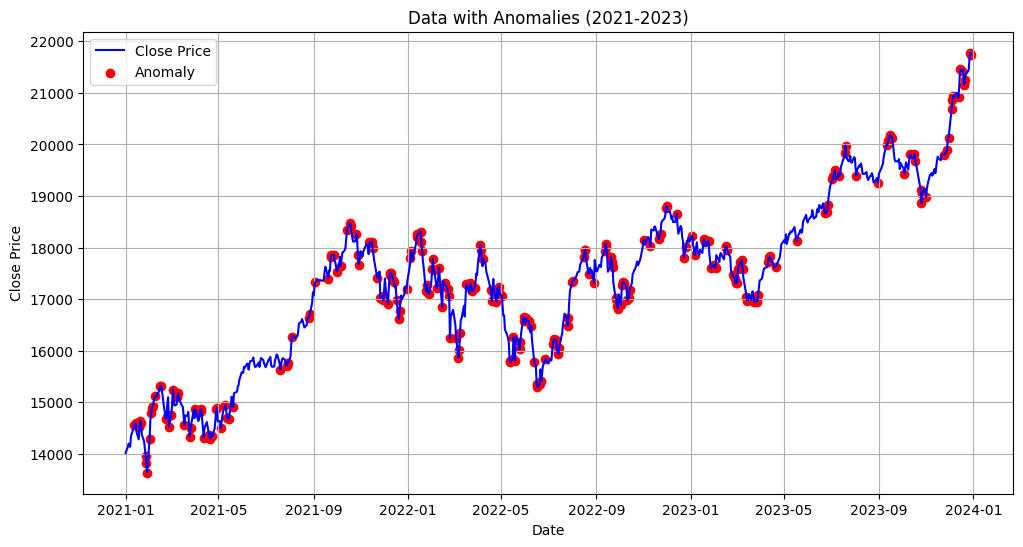

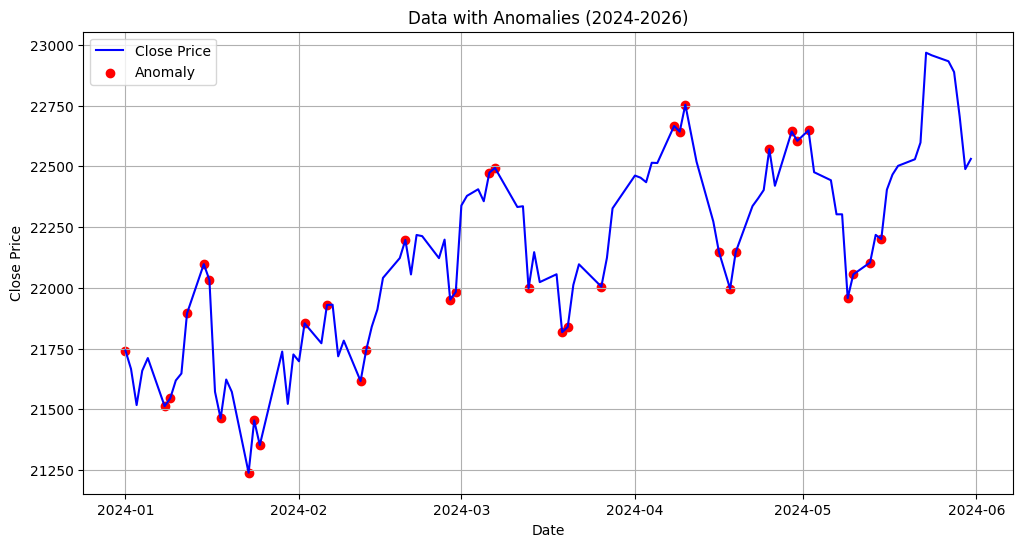

In [5]:
NIFTY_3 = plot_with_anomalies(NIFTY, anomalies, interval=3)

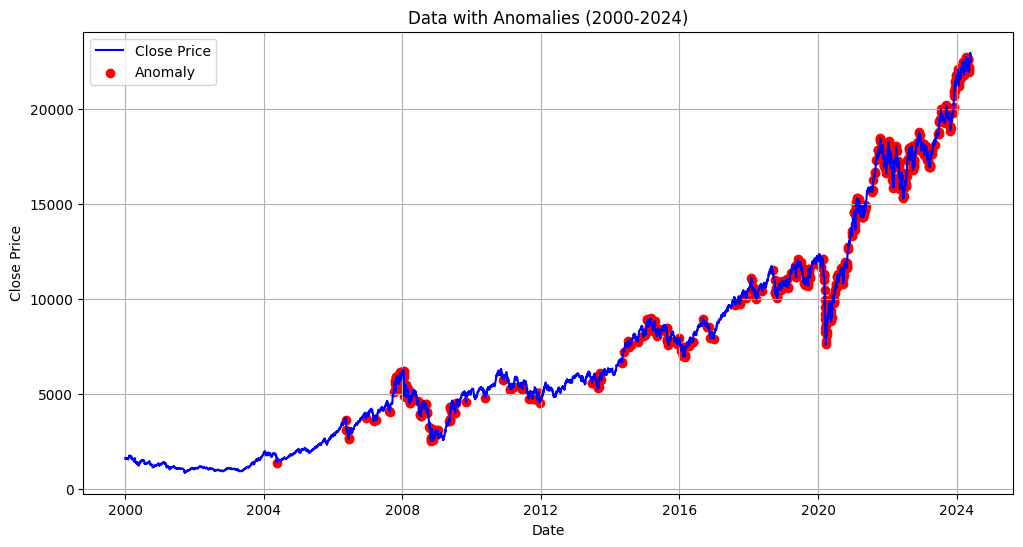

In [6]:
NIFTY_all = plot_with_anomalies(NIFTY, anomalies, interval = 25)

# IBOVESPA

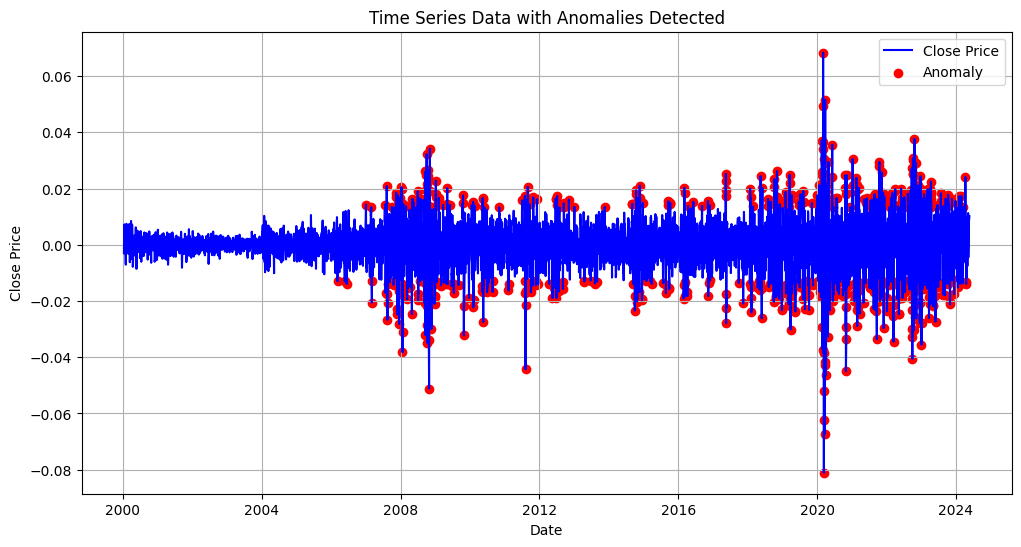

Anomalies:


,Open,High,Low,Close,Volume (in Million)
Date,,,,,
2006-03-09,-0.005000,-0.004529,-0.011316,-0.012985,0.002694
2006-05-24,-0.011106,-0.014320,-0.015618,-0.013075,-0.000835
2006-06-13,-0.009904,-0.013326,-0.010019,-0.013964,-0.000835
2007-01-02,0.006516,0.010979,0.010755,0.014310,-0.086856
2007-02-26,0.010314,0.010539,0.015493,0.013391,-0.177875
...,...,...,...,...,...
2024-03-11,-0.006499,-0.011789,-0.009474,-0.013742,-0.002779
2024-03-20,0.000916,0.008950,0.004390,0.013428,0.000733
2024-04-09,0.013116,0.016917,0.020868,0.024114,-0.007558


In [7]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data, period=14)

# Detect anomalies
anomalies = detect_anomalies(df_residuals)

# Display anomalies (dates)
print("Anomalies:")
anomalies

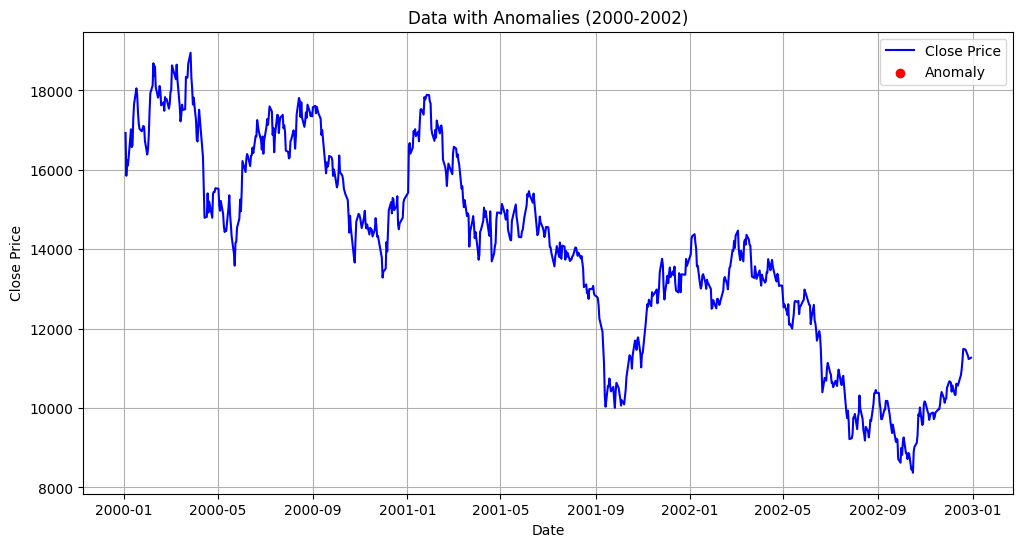

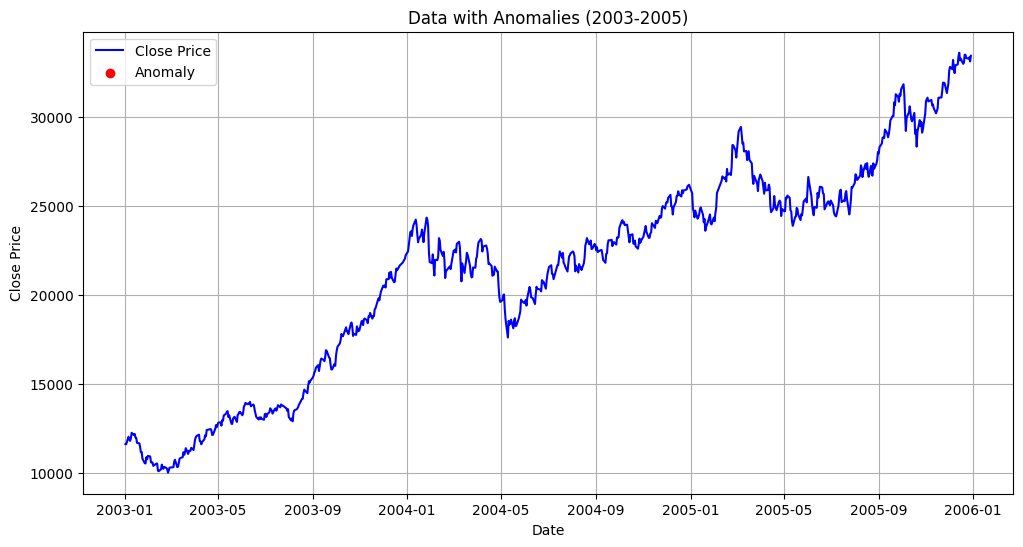

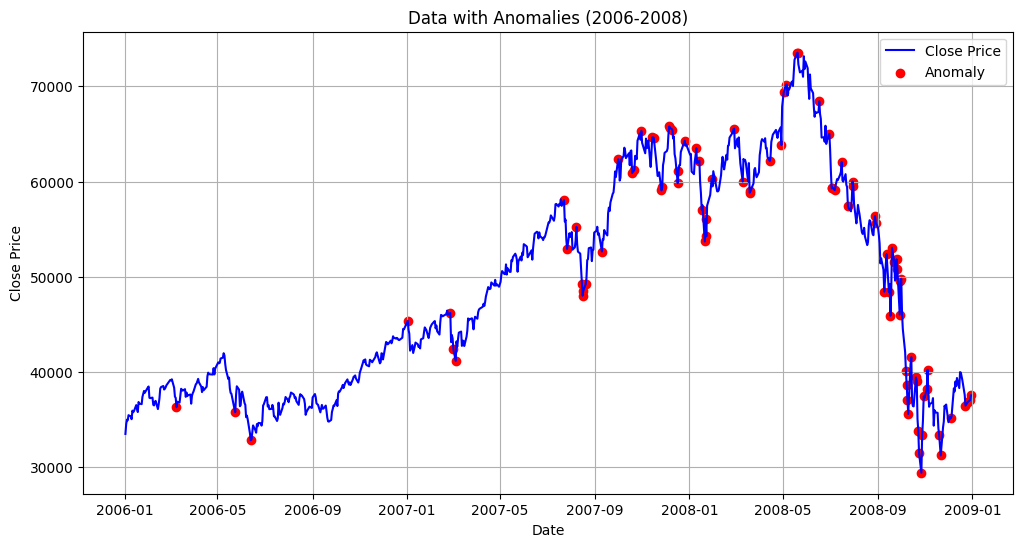

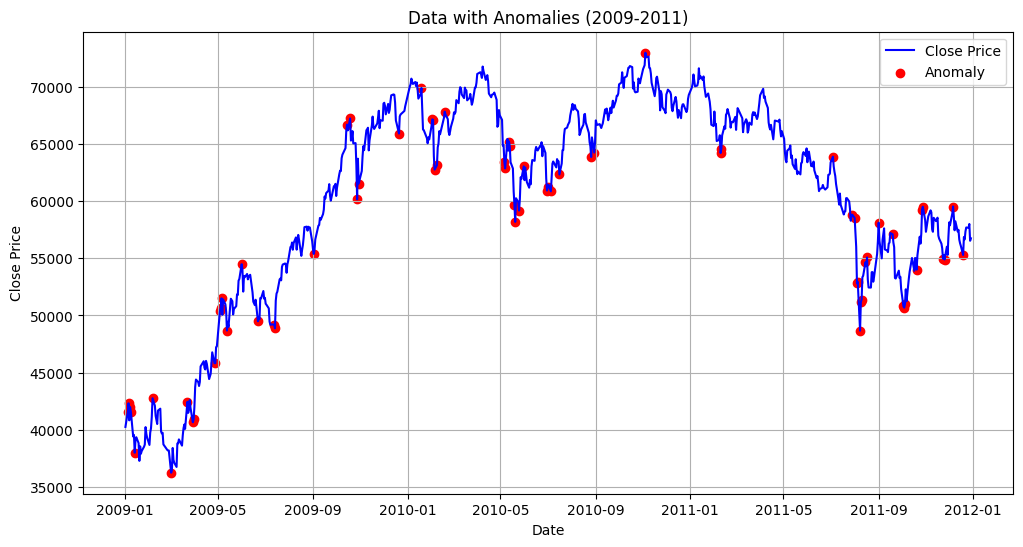

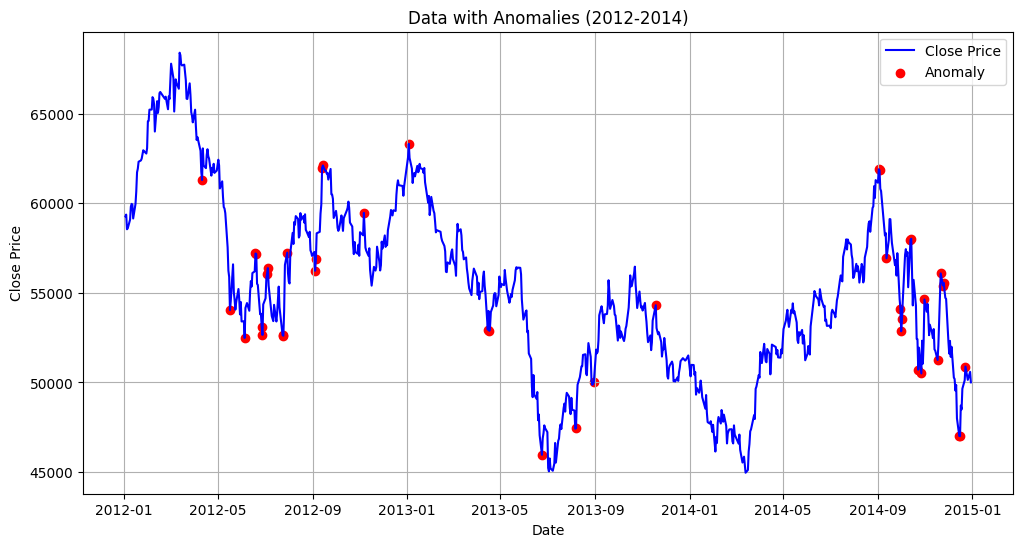

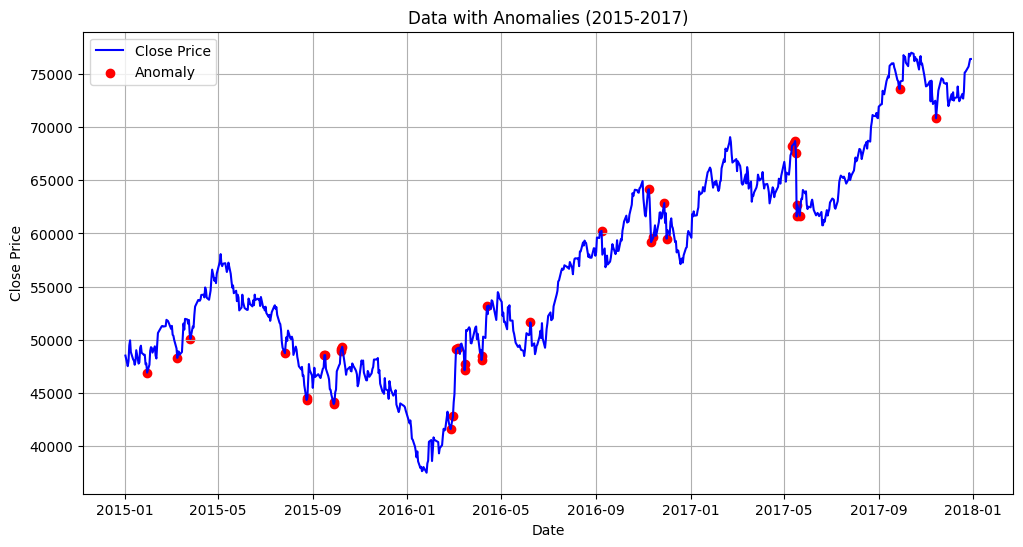

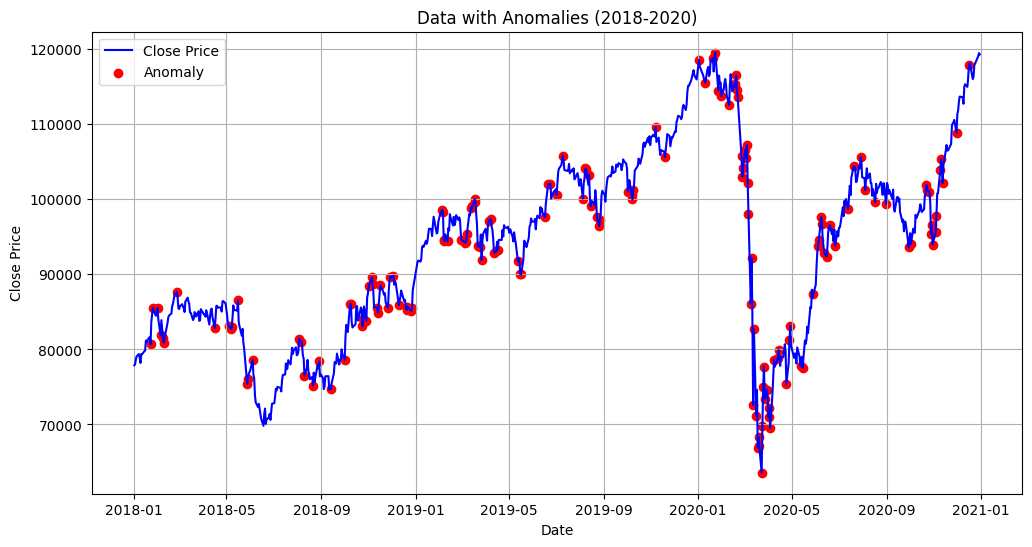

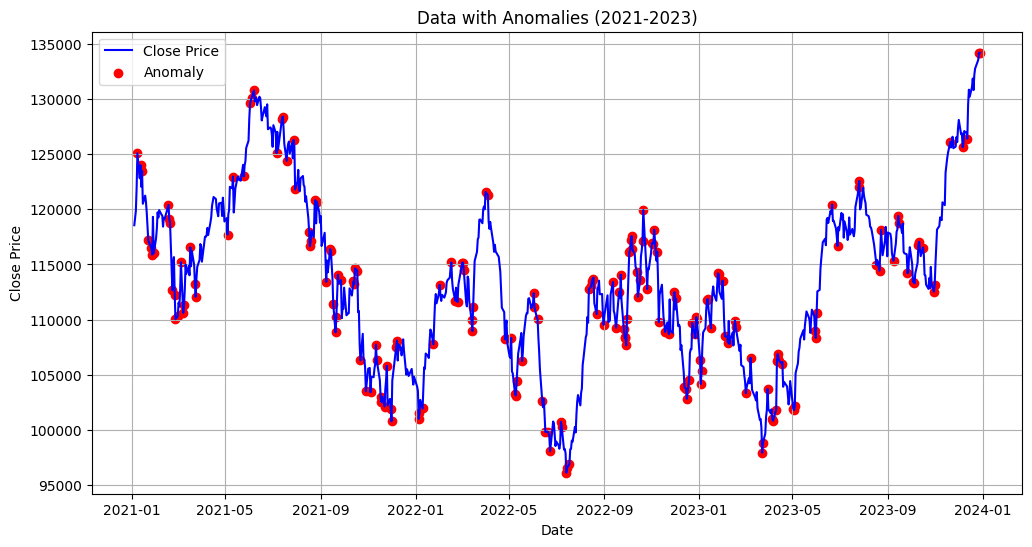

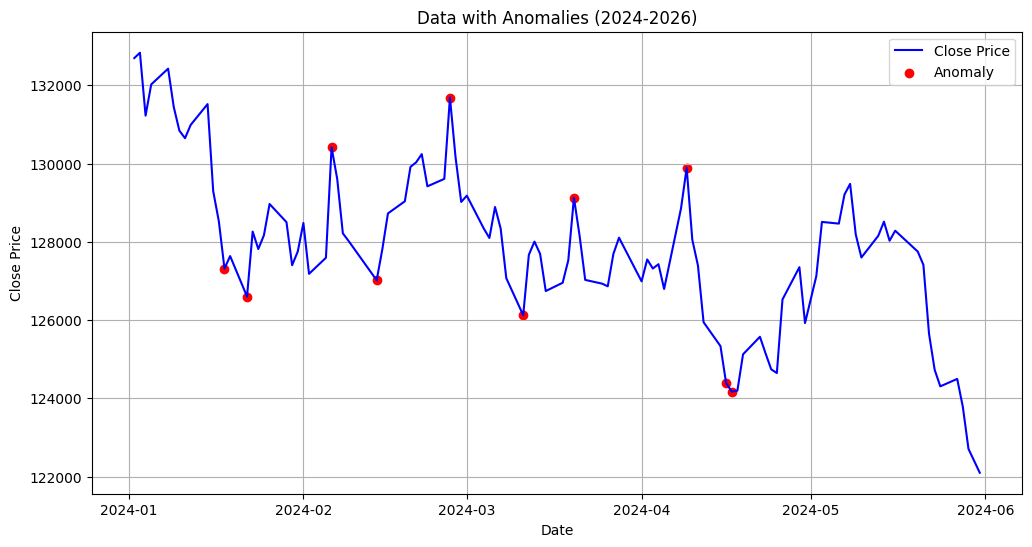

In [8]:
IBOV_3 = plot_with_anomalies(IBOV, anomalies, interval=3)

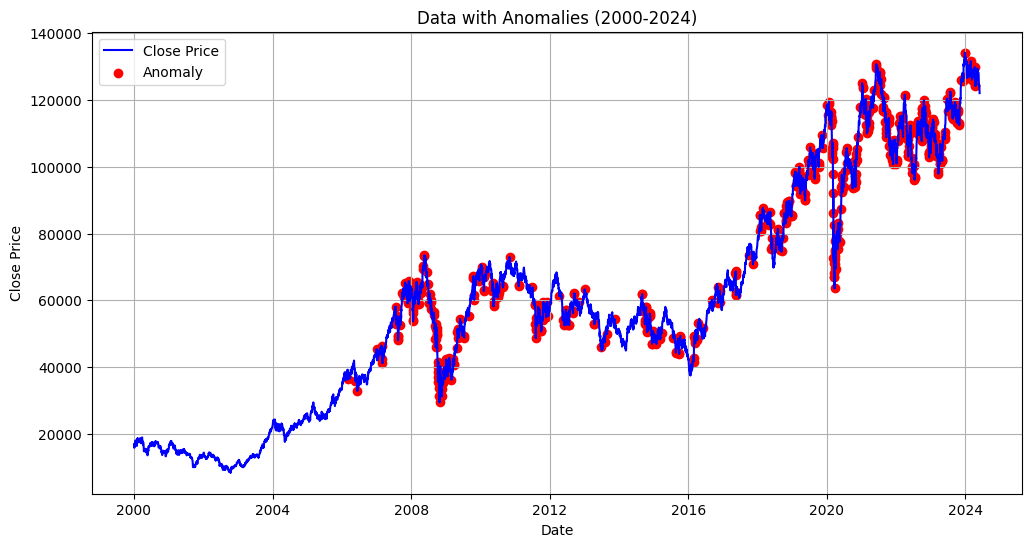

In [9]:
IBOV_all = plot_with_anomalies(IBOV, anomalies, 25)